In [1]:
import sunpy 
import astropy.units as u

from sunpy.net import Fido, attrs as a 
import astropy.time


from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import matplotlib as mpl 
from matplotlib.collections import LineCollection


import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 
from numpy import sqrt  

In [14]:
Sun_Start = "2021-04-19T23:36" #Start Time 
Sun_End = "2021-04-19T23:38" #End time 

Sun_Time = a.Time(Sun_Start , Sun_End) 

In [15]:
 Data = Fido.search(Sun_Time & a.Instrument.aia & a.Wavelength(94*u.angstrom)) #Gets Data

In [16]:
Data

Start Time,End Time,Source,Instrument,Wavelength [2],Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info
,,,,Angstrom,,,,,,,Mibyte,
Time,Time,str3,str3,float64,str4,str9,str6,str4,str4,str8,float64,str57
2021-04-19 23:36:11.000,2021-04-19 23:36:12.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-04-19 23:36:23.000,2021-04-19 23:36:24.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-04-19 23:36:35.000,2021-04-19 23:36:36.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-04-19 23:36:47.000,2021-04-19 23:36:48.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-04-19 23:36:59.000,2021-04-19 23:37:00.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-04-19 23:37:11.000,2021-04-19 23:37:12.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-04-19 23:37:23.000,2021-04-19 23:37:24.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"
2021-04-19 23:37:35.000,2021-04-19 23:37:36.000,SDO,AIA,94.0 .. 94.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.901 exposure] [100.00 percentd]"


In [17]:
files = Fido.fetch(Data)

Files Downloaded:   0%|          | 0/10 [00:00<?, ?file/s]

aia_lev1_94a_2021_04_19t23_36_23_14z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_94a_2021_04_19t23_36_35_12z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_94a_2021_04_19t23_36_59_12z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_94a_2021_04_19t23_36_11_12z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_94a_2021_04_19t23_36_47_12z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_94a_2021_04_19t23_37_11_14z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_94a_2021_04_19t23_37_23_12z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_94a_2021_04_19t23_37_35_12z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_94a_2021_04_19t23_37_47_12z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_94a_2021_04_19t23_37_59_12z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

In [18]:
files

['C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_59_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_11_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_59_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_35_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_35_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_23_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_47_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_47_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_11_14z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_23_14z_image_lev1.fits']

In [19]:
Fido.fetch(files)#fetch files on computer

Files Downloaded: 0file [00:00, ?file/s]

['C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_59_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_11_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_59_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_35_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_35_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_23_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_47_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_47_12z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_37_11_14z_image_lev1.fits', 'C:\\Users\\14242\\sunpy\\data\\aia_lev1_94a_2021_04_19t23_36_23_14z_image_lev1.fits']

In [20]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\Aug Solor flare Pic\*')

In [21]:
data_average = [] #Averages subtracted data
data_median = [] #Median subtracted data
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata))  
    
Arr=np.array(data_average)#Converts Arr list into numpy array

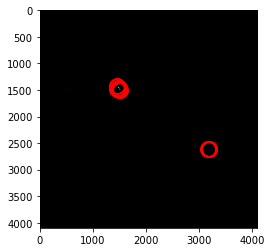

In [22]:
#Use trackpy to locate Gaussian-like blobs of some image
f = tp.locate(Arr[0], 11, invert = True, minmass = 70) 

tp.annotate(f,Arr[0]);#Creates the graph of f 

In [23]:
r = tp.batch(Arr,11, minmass =50); 

Frame 9: 12 features


In [24]:
t = tp.link(r,5,memory = 9)

Frame 9: 12 trajectories present.


In [25]:
t1 = tp.filter_stubs(t,5) #Filters out Spurious traj 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 15
After: 10


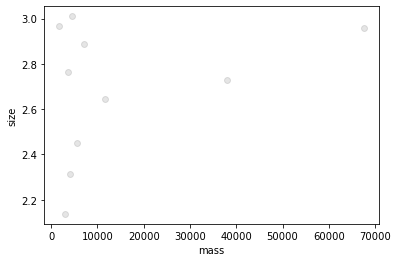

In [35]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean());

In [36]:
#Had o chane mass from orig code
t2 = t1[((t1['mass'] <15000 ) & (t1['size'] > 2.2) &
         (t1['ecc'] < 1))]

In [38]:
R = 1625.691406

In [39]:
iloc_valid = []

for i in range(len(t)):
    r = np.sqrt((t2['x'].iloc[i]- 2070.828369)**2 + (t2['y'].iloc[i] - 2008.760620)**2)
    if r<R: 
        print (r, t2['particle'].iloc[i])
        iloc_valid.append(i)
  

849.3094600743851 0
837.0556194096198 1
761.8962403762674 3
1288.2163999935508 6
1274.4976344956299 7
1262.9914368760176 8
1252.7993750811522 11
1275.4810153312012 7
1263.065448543939 8
1287.9851566974528 6
837.070657508386 1
764.5125922164955 3
848.9975506605953 0
853.1998414090967 12
1263.444755948974 8
1252.063935580904 11
1275.4368162795442 7
1288.0862850145054 6
763.7253563413161 3
836.9696265807402 1
1275.3943196565926 7
1263.4804141772747 8
1287.904777709989 6
1253.5499063934258 11
836.9821928897745 1
847.934975240293 0
762.5728978983727 3
1255.7744892721685 11
1276.1253831635718 7
1263.5225818500492 8
1288.0819837760914 6
761.7867657142722 3
836.4784307133039 1
853.2802481156949 12
1288.1917987284796 6
1256.6557558409177 11
1263.5268952556737 8
1276.1229037640671 7
836.3549635455583 1
764.504323654224 3
1254.9435041925644 11
1276.285924972042 7
1263.4654487549442 8
1288.2026911330308 6
761.1474810875967 3
836.2353587631562 1
1277.000624188087 7
1263.5483634714349 8
1288.1945084

IndexError: single positional indexer is out-of-bounds

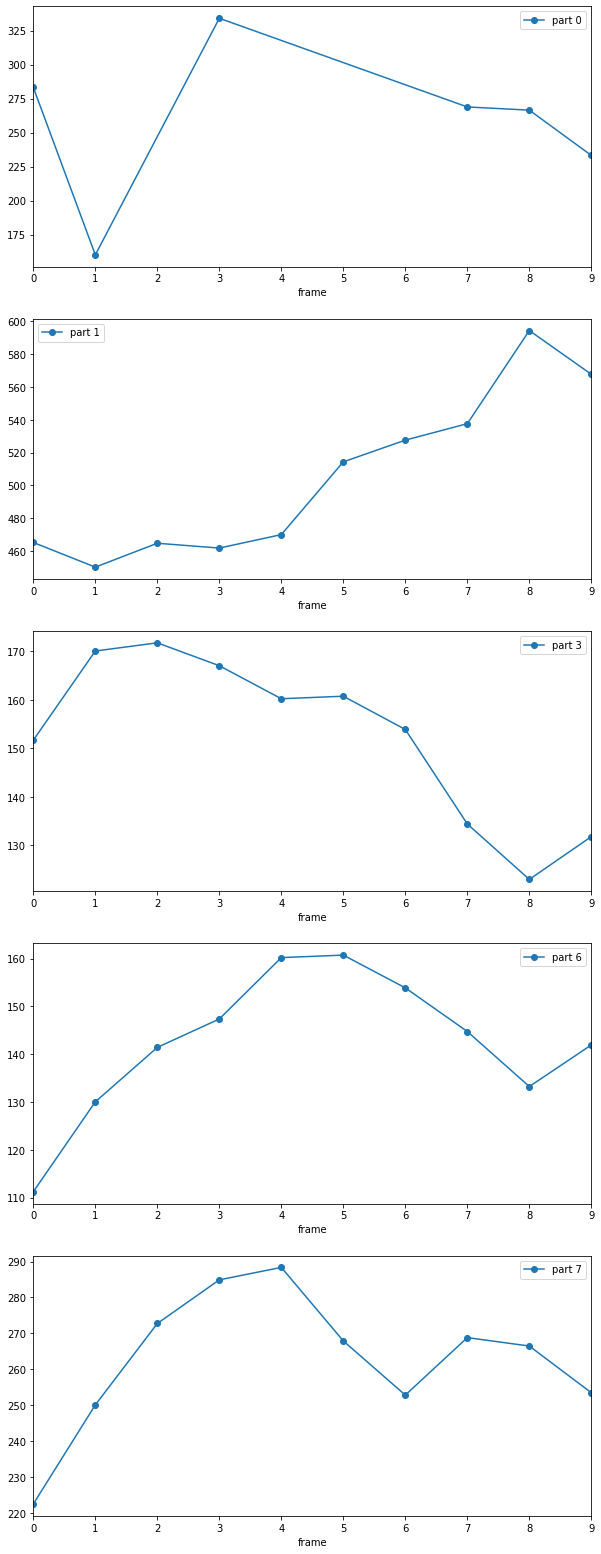

In [40]:
Tot_part = len(t2.iloc[iloc_valid].particle.unique())#Total # of particles        
Position = range(1,Tot_part+1) 
fig = plt.figure(1,figsize = (10,45)) 

i = 0
for p in range(Tot_part): ##Repeats the action below 
       
    if not (t2.loc[t2.particle==p].empty): 
        ax = fig.add_subplot(Tot_part, 1,Position[i])##Defining Plots axis bounds 
        ax.set_xlim((0,9))##Sets Frame bounds 
        t2.loc[t2.particle==p].plot(x='frame',y='signal', 
                               style = '-o',label =f'part {p}',ax=ax) 
        i += 1
plt.show()

In [41]:
Bull=[]
for i in range(10): 
    s= t2.iloc[iloc_valid].loc[i].sum(axis=0).loc['signal']  
    Bull+=[s]

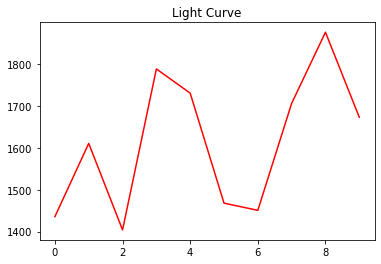

In [42]:
x = np.linspace(0, 9, num=10)
y = np.array(Bull)

plt.title('Light Curve')
plt.plot(x, y, color="red")

plt.show()